In [1]:
# Imports
import sys
sys.path.append("../")
from src import get_worst_instance
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Constants
Ts = [1, 2, 5]
mu = 0.5
L = 1
gamma = 2 / (L + mu)
EPSILONS = np.linspace(0.01, 0.1, 100)
phi_opt = max(1 - mu * gamma, L * gamma - 1)

def to_add(eps):
    def additional(sgd):
        sgd.constraints += [
            sgd.vars[0][0] == (phi_opt ** 2 + eps) ** sgd.NB_ITS
        ]
    return additional

get_variance = lambda gamma, T, eps: get_worst_instance(gamma, T, mu, L, additional_constraints=to_add(eps), objective="variance", solver="CLARABEL")
instances = [[get_variance(gamma, T, eps) for eps in tqdm(EPSILONS)] for T in Ts]

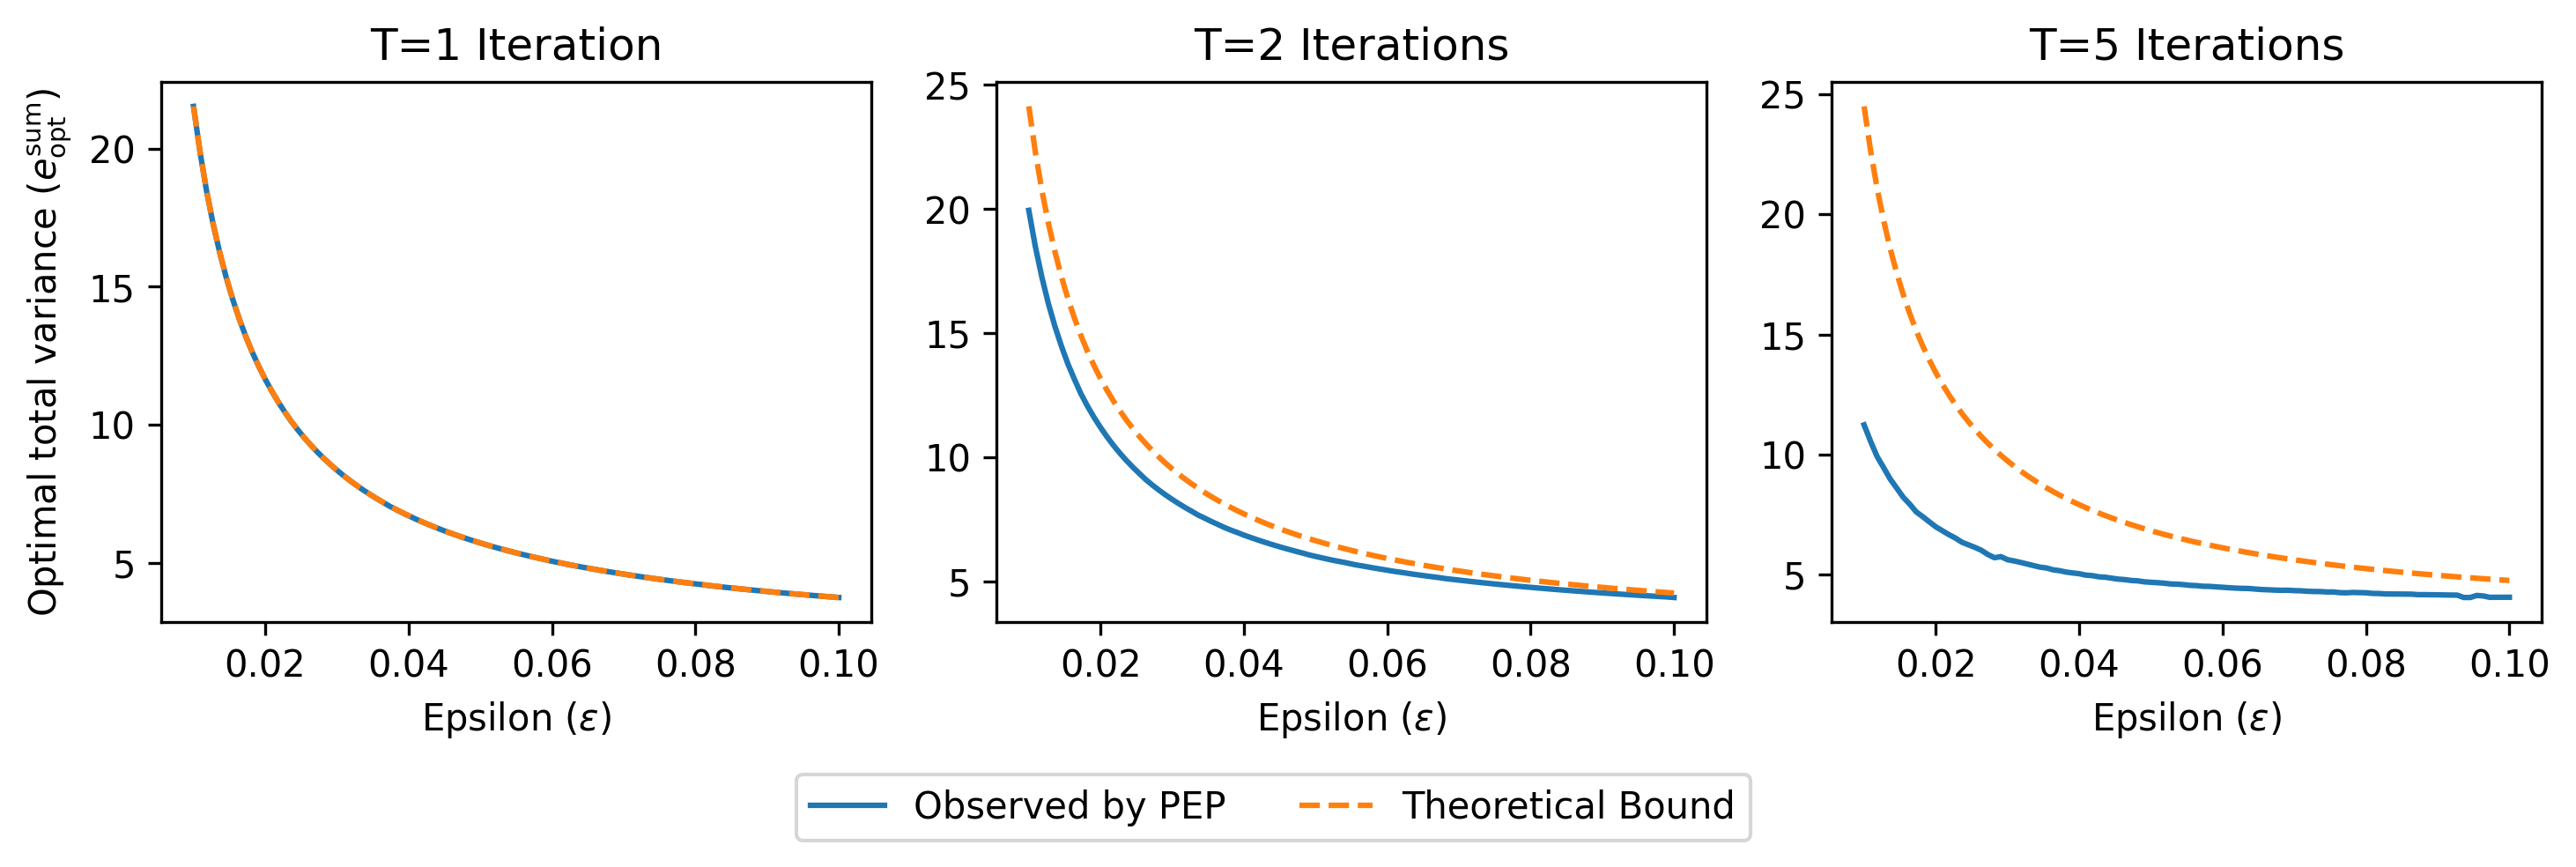

In [8]:
# Plot result with theoretical overlay for rates
fig, axs = plt.subplots(1, 3, figsize=(10, 3), dpi=300)

# Theoretical bound
e_theory = lambda eps: gamma ** 2 * (1 + (gamma ** 2 * (L - mu) ** 2) / (4 * eps))
variance_theory = lambda T, eps: e_theory(eps) * (1 - (phi_opt ** 2 + eps) ** T) / (1 - (phi_opt ** 2 + eps))

for i, (T, ax) in enumerate(zip(Ts, axs.flatten())):
    # Plot empirical results
    ax.plot(EPSILONS, [inst.param.variance_sum.value for inst in instances[i]], label=r"Observed by PEP")
    
    # Plot theoretical bound
    ax.plot(EPSILONS, [variance_theory(T, eps) for eps in EPSILONS], "--", label="Theoretical Bound")
    
    # Axis metadata
    ax.set_title(f"T={T} Iteration{'s' if T > 1 else ''}")
    ax.set_xlabel(r"Epsilon ($\varepsilon$)")
    if i == 0: ax.set_ylabel(r"Optimal total variance ($e^\text{sum}_\text{opt}$)")
    
# Get and show legend
handles, labels = axs.flatten()[0].get_legend_handles_labels()
plt.tight_layout()
fig.legend(handles, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.1))
plt.show()